In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SBI.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
#Checking rows and columns
df.shape

(1338, 8)

In [4]:
#checking types of variables
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
#checking statistical properties
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
#checking null
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
sns.set(color_codes=True)

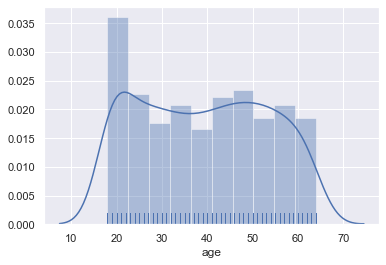

In [10]:
#Univariate analysis
sns.distplot(df['age'],bins=10,rug=True)

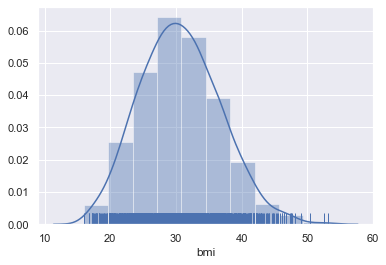

In [11]:
sns.distplot(df['bmi'],bins=10,rug=True)

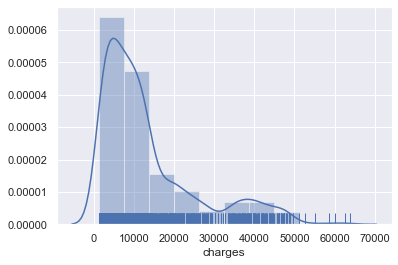

In [12]:
sns.distplot(df['charges'],bins=10,rug=True)

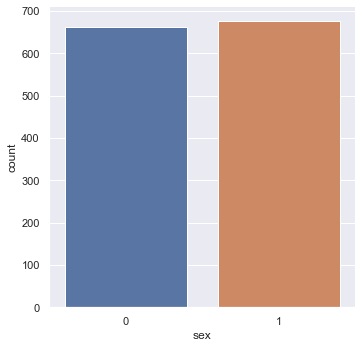

In [13]:
sns.catplot(x='sex',kind='count',data=df)

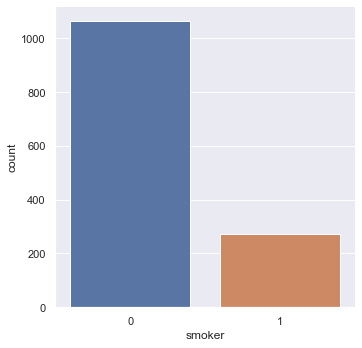

In [14]:
sns.catplot(x='smoker',kind='count',data=df)

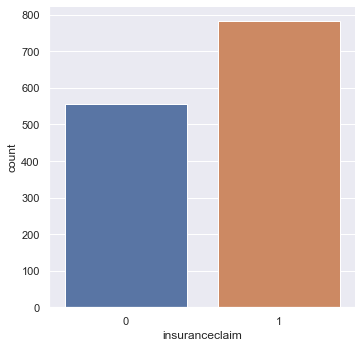

In [15]:
sns.catplot(x='insuranceclaim',kind='count',data=df)

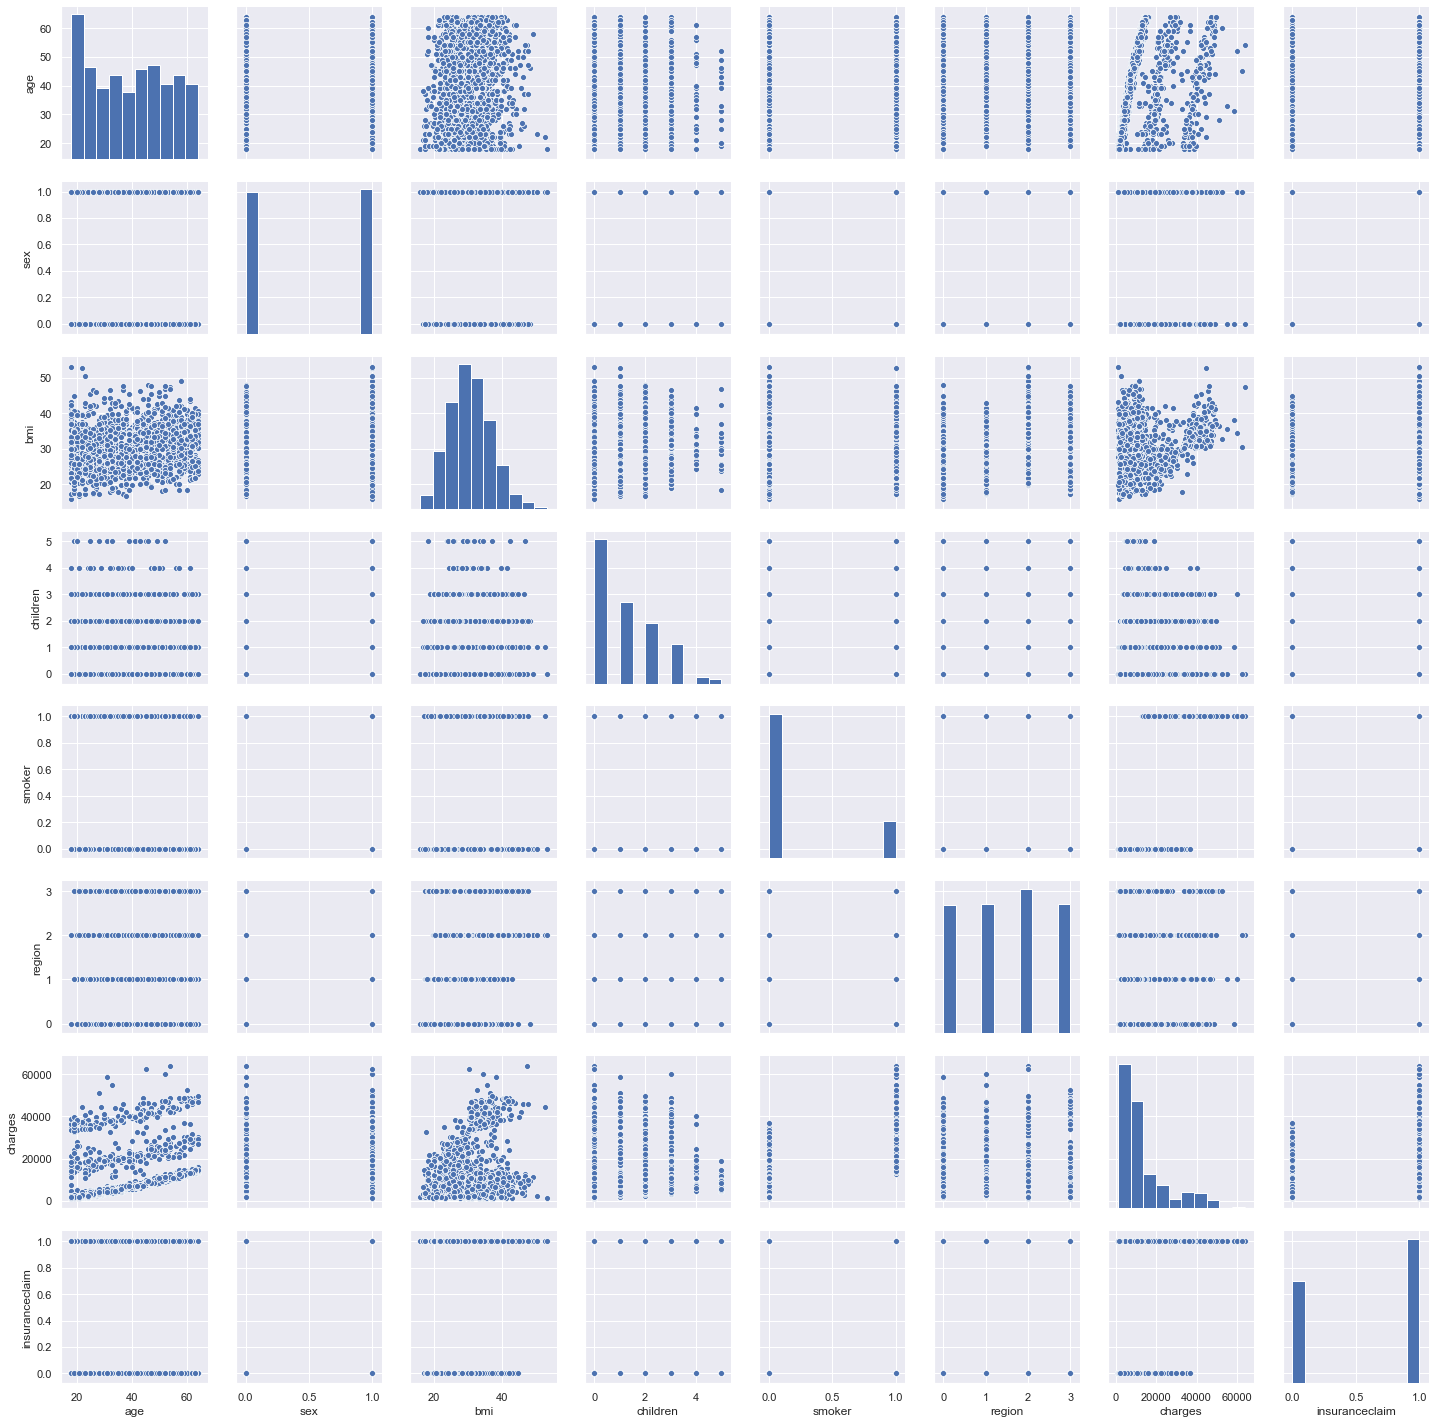

In [16]:
#bivariate analysis
sns.pairplot(df)

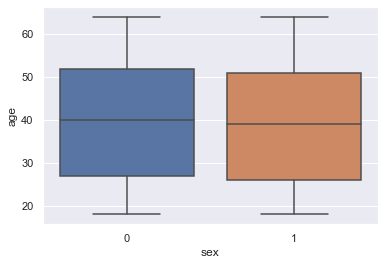

In [17]:
sns.boxplot(x='sex',y='age',data=df)

In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


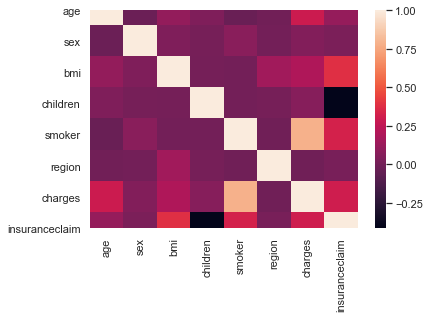

In [19]:
sns.heatmap(df.corr())

In [20]:
#Splitting the data into x and y
x=df.drop(columns='insuranceclaim',axis=1)
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
x.shape

(1338, 7)

In [22]:
y=df['insuranceclaim']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [23]:
y.shape

(1338,)

In [24]:
x.shape

(1338, 7)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mn=MinMaxScaler()
x_scaled=mn.fit_transform(x)
x_scaled

array([[0.02173913, 0.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

In [27]:
x_scaled.shape

(1338, 7)

In [28]:
x.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
x=pd.DataFrame(x_scaled,columns=['age','sex','bmi','children','smoker','region','charges'])

In [ ]:
x.head()

In [31]:
x.shape

(1338, 7)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=56,stratify=y)

In [34]:
train_x.head()

,age,sex,bmi,children,smoker,region,charges
660,37,1,46.530,3,0,2,6435.62370
1150,18,0,30.305,0,0,0,2203.73595
1105,54,0,31.240,0,0,2,10338.93160
345,34,0,29.260,3,0,2,6184.29940
896,43,0,20.045,2,1,0,19798.05455


In [35]:
train_x.shape

(1003, 7)

In [36]:
test_x.shape

(335, 7)

In [37]:
train_y.shape

(1003,)

In [38]:
test_y.shape

(335,)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg=LogisticRegression()

In [41]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [42]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lg.score(train_x,train_y)

0.7826520438683948

In [44]:
pred=lg.predict(test_x)

In [45]:
print(pred)
print('actual:',test_y)

[0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1
 0 1]
actual: 1085    0
877     0
1050    1
553     0
681     0
       ..
47      1
307     1
30      1
104     0
1151    1
Name: insuranceclaim, Length: 335, dtype: int64


In [46]:
cm=confusion_matrix(pred,test_y)

In [47]:
cm

array([[ 97,  18],
       [ 42, 178]], dtype=int64)

In [48]:
print(classification_report(pred,test_y))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       115
           1       0.91      0.81      0.86       220

    accuracy                           0.82       335
   macro avg       0.80      0.83      0.81       335
weighted avg       0.84      0.82      0.82       335



In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [50]:
clf=KNN(n_neighbors=7)

In [51]:
clf.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [52]:
test_predict=clf.predict(test_x)

In [53]:
k=f1_score(test_predict,test_y)

In [54]:
k

0.7121951219512195

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
score=cross_val_score(KNN(n_neighbors=7), X=train_x, y=train_y, cv=10)
score

array([0.63366337, 0.67326733, 0.63366337, 0.64356436, 0.65346535,
       0.58415842, 0.56      , 0.56565657, 0.56565657, 0.60606061])

In [57]:
score.mean()*100

61.1915591559156

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier(n_estimators=12,max_depth=12)

In [60]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
rf.score(train_x,train_y)

0.9950149551345963

In [62]:
test2_predict=rf.predict(test_x)

In [63]:
k2=f1_score(test2_predict,test_y)

In [64]:
print(k2)

0.9610389610389609


In [65]:
print('cmetrics:',confusion_matrix(test2_predict,test_y))

cmetrics: [[135  11]
 [  4 185]]


In [66]:
#saving random forest as a final model

from sklearn.externals import joblib

In [67]:
joblib.dump(rf,'rf_joblib')

['rf_joblib']